In [22]:
import ast
import json
import re
import string
import time
import sys
import datetime
import contextlib
import os
from datetime import timedelta

import requests
import ssl
import tempfile
from io import StringIO

import pandas as pd
import numpy as np
import glob
from pathlib import Path


import datetime
import seaborn as sns
# from minepy import MINE
# from heapq import merge

import matplotlib.pyplot as plt

import seaborn as sns
from statsmodels.tsa.seasonal import STL, seasonal_decompose
# from meteostat import Point, Daily, Hourly
from dateutil.relativedelta import relativedelta

from dateutil import relativedelta
from sklearn.preprocessing import PolynomialFeatures


from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC

from sklearn.preprocessing import StandardScaler

In [43]:
fileAll="Z:\Dropbox (PowerMarketsUR)\Moscow Office\ERCOT\MCC_INFLUENCE\spp\model\dataset/CSWS.VOLT.0124_final.csv"
data = pd.read_csv(fileAll, low_memory=False)
data['Data'] = pd.to_datetime(data['Data'], format='%Y-%m-%d')
data.sort_values(by=['Data'], ascending=True, inplace=True)

Data = data[["Data"]].copy()
price = data[["Price"]].copy()
paramsPoly = data[["Wind", "Coal","Load","NaturalGas","PriceGaz","temp_mean"]].copy()
# params = data[["Wind", "Coal","Load","NaturalGas","PriceGaz","temp_mean"]].copy()

# trans = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
# paramsTransform = trans.fit_transform(params)
# paramsPoly = pd.DataFrame(data=paramsTransform, columns=trans.get_feature_names(params.columns))
# paramsPoly

In [52]:
analis = pd.concat([Data, price, paramsPoly], axis=1).copy()
analis

,Data,Price,Wind,Coal,Load,NaturalGas,PriceGaz,temp_mean
0,2022-04-01 00:00:00,1.1016,11261.300,9906.600,27364.785,4318.000,5.43,17.0
1,2022-04-01 01:00:00,1.9007,12656.000,9607.008,27144.399,2899.783,5.43,17.0
2,2022-04-01 02:00:00,3.8994,13150.708,9300.617,27117.422,2830.575,5.43,17.0
3,2022-04-01 03:00:00,2.9296,13862.425,8811.367,27297.655,2771.042,5.43,17.0
4,2022-04-01 04:00:00,2.3903,14428.500,9045.167,27823.858,2950.642,5.43,17.0
...,...,...,...,...,...,...,...,...
5282,2022-11-07 20:00:00,12.0815,18579.892,3235.842,29452.850,6788.167,4.62,16.0
5283,2022-11-07 21:00:00,20.8286,19330.683,3018.142,28559.588,5713.508,4.62,16.0
5284,2022-11-07 22:00:00,23.8164,19511.817,2811.475,27382.076,4851.733,4.62,16.0
5285,2022-11-07 23:00:00,18.5490,19282.625,2681.342,26143.921,4235.075,4.62,16.0


In [61]:
x = datetime.datetime(2020, 1, 1)
y = datetime.datetime(2022, 8, 10)
z = datetime.datetime(2022, 10, 10)

dataTrain = analis[(analis['Data'] >= x) & (analis['Data'] < y) ].copy()
dataPred = analis[(analis['Data'] >= y) & (analis['Data'] < z)].copy()

scalerFeat = StandardScaler()
scalerPrice = StandardScaler()

y_train = dataTrain['Price'].copy()
X_train = dataTrain.drop(["Data", 'Price'], axis=1).copy()

y_test = dataPred['Price'].copy()
X_test = dataPred.drop(["Data", 'Price'], axis=1).copy()

y_col = ["Price"]
x_col = X_train.columns



X_train = scalerFeat.fit_transform(X_train)
X_test = scalerFeat.transform(X_test)   

y_train = scalerPrice.fit_transform(y_train.to_numpy().reshape(-1, 1))
y_test = scalerPrice.transform(y_test.to_numpy().reshape(-1, 1))


X_test = pd.DataFrame(data=X_test, columns=x_col)
y_test




array([[-0.74029458],
       [-0.70553255],
       [-0.69923508],
       ...,
       [-0.74384384],
       [-0.73515837],
       [-0.73885372]])

In [64]:
reg = LinearRegression(fit_intercept=True).fit(X_train, y_train)
y_pred = reg.predict(X_test)

c:\study\venv\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([[-1.13636609],
       [-1.21780467],
       [-1.34281804],
       ...,
       [-1.06613403],
       [-0.93994352],
       [-0.82493168]])

In [63]:
price = pd.DataFrame()
price["Price"] =y_test
price["PredPrice"] = y_pred
# price["Wind"] = X_test['Wind']

price.index = dataPred["Data"]

plt.rcParams['figure.figsize'] = (25,15)
sns.lineplot(data=price, x='Data', y='Price', label="Price")
sns.lineplot(data=price, x='Data', y='PredPrice', label="PredPrice")
# sns.lineplot(data=price, x='Data', y='Wind', label="PredPrice")

# plt.ylim(0, 10)
plt.show()

ValueError: Cannot set a frame with no defined index and a value that cannot be converted to a Series

In [17]:
from sklearn.svm import SVR
model = SVR(kernel='rbf', C=12, epsilon=1).fit(X_train, y_train)

y_svd = reg.predict(X_test)
y_svd

array([-15.85343858, -19.08642672, -24.04926843, ..., -13.06533226,
        -8.05576016,  -3.4899645 ])

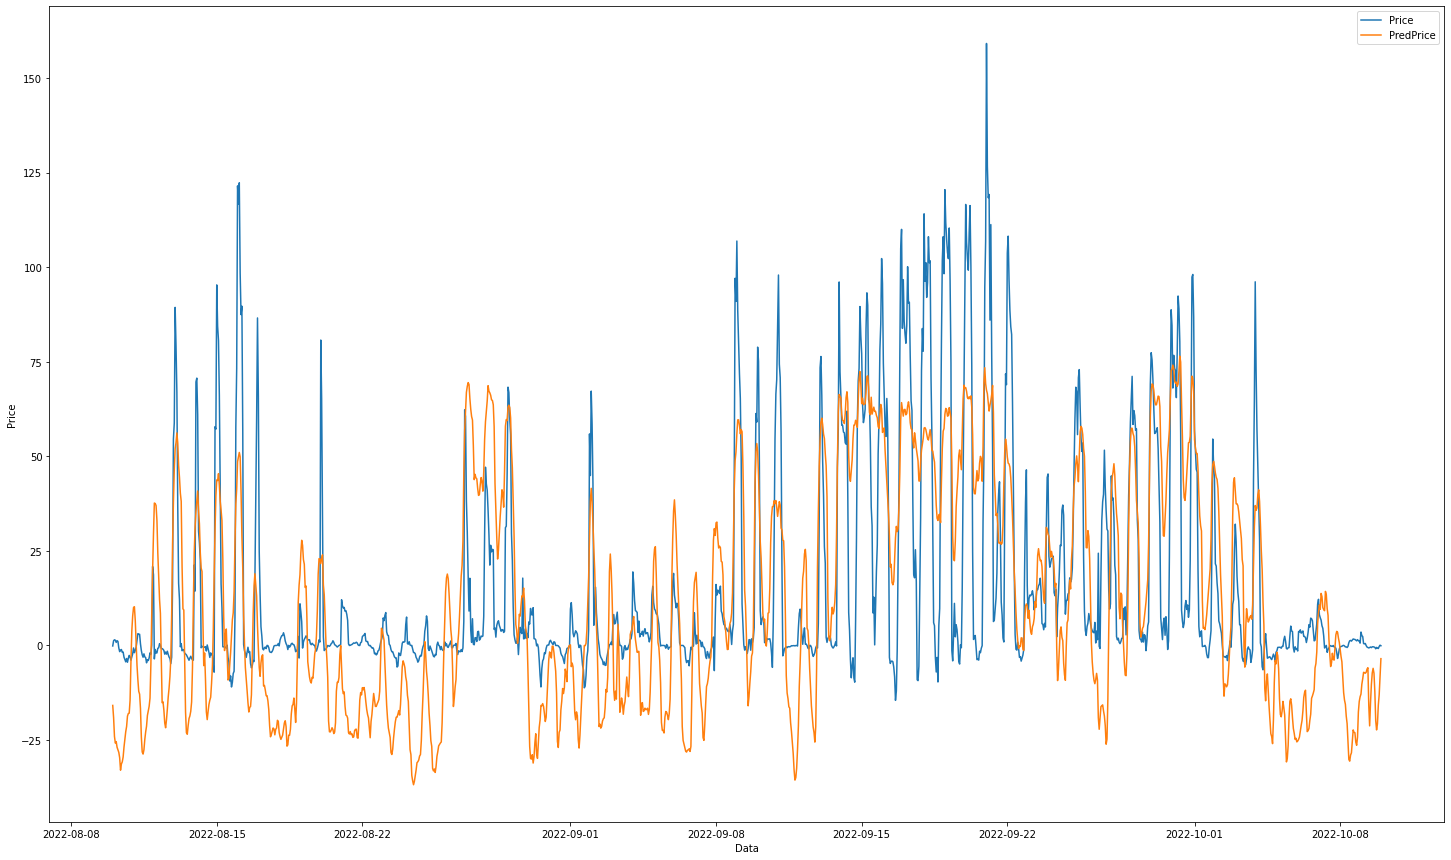

In [18]:

price = pd.DataFrame()
price["Price"] =y_test
price["PredPrice"] = y_svd

# price["diff"] =  (price['pred'] - oosDF['y']).abs()
price.index = dataPred["Data"]


plt.rcParams['figure.figsize'] = (25,15)
sns.lineplot(data=price, x='Data', y='Price', label="Price")
sns.lineplot(data=price, x='Data', y='PredPrice', label="PredPrice")

# plt.ylim(0, 10)
plt.show()